# NAMA  : Arhan Malik Alrasyid
# NIM   : 20220801151
# Tugas : Data Mining

# Monitoring Trend Google dengan Python

## penjelasan
Google Trends adalah layanan dari Google yang menunjukkan seberapa sering sebuah kata kunci dicari dalam kurun waktu tertentu. Tools ini sangat berguna untuk memahami minat publik terhadap suatu topik berdasarkan waktu dan lokasi.

## Machine yang saya buat 
Analisis Perbandingan Popularitas "Python" vs "Java"
### Berdasarkan:
- Waktu (Interest Over Time) → Dalam 3 bulan terakhir.
- Wilayah Geografis di Indonesia (Interest by Region) → Kota/provinsi yang paling banyak mencari kedua keyword tersebut.

 2. Instalasi Library (jika belum terinstall, jalankan baris ini)
 
 !pip install pytrends pandas matplotlib seaborn

3. Import Library

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
import warnings

from pytrends.request import TrendReq

# Set style untuk visualisasi
sns.set(style='whitegrid')

4. Input dari User

In [7]:
keywords = ["Python", "Java"]  # Ganti sesuai kebutuhan
geo = "ID"  # Lokasi: ID = Indonesia
timeframe = "today 3-m"  # Rentang waktu: 3 bulan terakhir

5. Ambil Data dari Google Trends

In [8]:
# NOTE: HINDARI error TooManyRequestsError dengan sleep dan retry kecil
pytrends = TrendReq(hl='en-US', tz=360)  # Jangan pakai retries (karena error method_whitelist)
warnings.simplefilter(action='ignore', category=FutureWarning)

# Delay manual antar request (penting untuk menghindari 429)
time.sleep(2)

# Ambil payload
pytrends.build_payload(keywords, timeframe=timeframe, geo=geo)

# Delay lagi agar aman
time.sleep(2)

# Interest over time
data_over_time = pytrends.interest_over_time()
if 'isPartial' in data_over_time.columns:
    data_over_time.drop(columns=['isPartial'], inplace=True)
print(data_over_time.head())

            Python  Java
date                    
2025-02-04      67    82
2025-02-05      61    85
2025-02-06      58    73
2025-02-07      50    84
2025-02-08      42    74


6. Visualisasi Interest Over Time

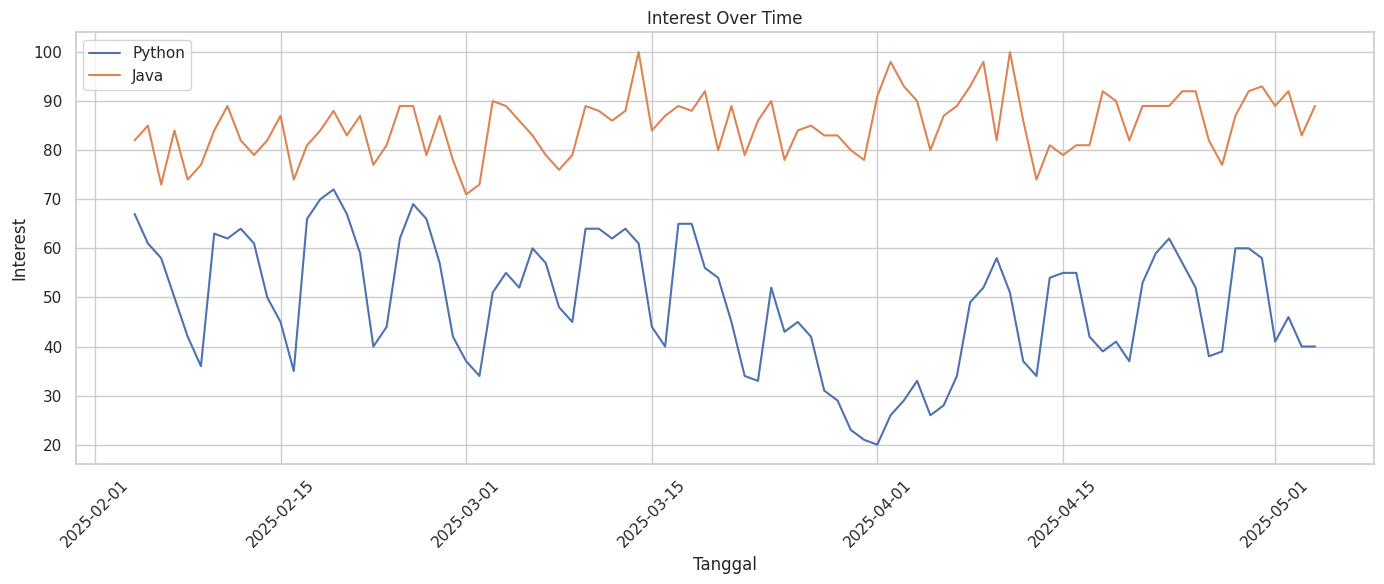

In [9]:
plt.figure(figsize=(14, 6))
for keyword in keywords:
    plt.plot(data_over_time.index, data_over_time[keyword], label=keyword)
plt.legend()
plt.title('Interest Over Time')
plt.xlabel('Tanggal')
plt.ylabel('Interest')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

7. Interest by Region

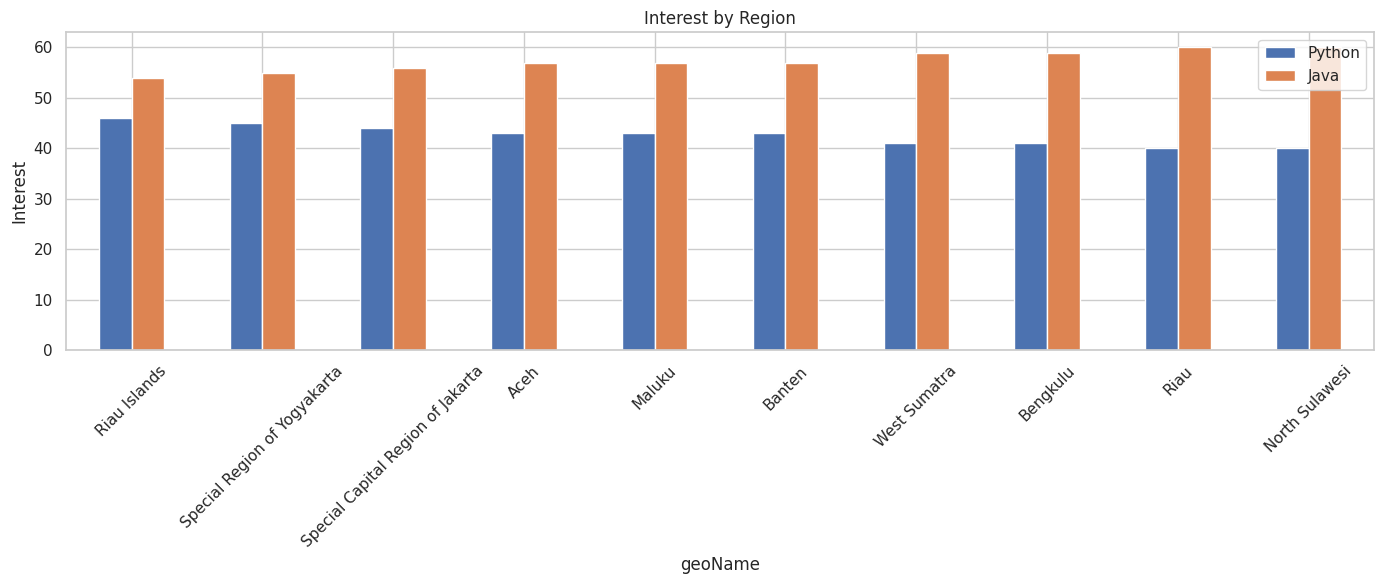

In [10]:
# Tambahkan delay agar tidak terkena batasan
time.sleep(2)

region_data = pytrends.interest_by_region()
region_data = region_data.sort_values(by=keywords[0], ascending=False).head(10)

# Plot Interest by Region
region_data[keywords].plot(kind='bar', figsize=(14, 6))
plt.title('Interest by Region')
plt.ylabel('Interest')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()